In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\JOSH\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\JOSH\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\JOSH\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("customer_booking.csv", encoding='ISO-8859-1')
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [3]:
df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [4]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [5]:
df.isnull().any()

num_passengers           False
sales_channel            False
trip_type                False
purchase_lead            False
length_of_stay           False
flight_hour              False
flight_day               False
route                    False
booking_origin           False
wants_extra_baggage      False
wants_preferred_seat     False
wants_in_flight_meals    False
flight_duration          False
booking_complete         False
dtype: bool

In [6]:
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

1

In [21]:
df.shape

(50000, 14)

In [22]:
df.flight_day.unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [23]:
maping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
    
}
df['flight_day'] = df['flight_day'].map(maping)

In [24]:
df.flight_day.unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [25]:
df.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,<bound method NDFrame._add_numeric_operations....,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,<bound method NDFrame._add_numeric_operations....,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,<bound method NDFrame._add_numeric_operations....,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,<bound method NDFrame._add_numeric_operations....,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,<bound method NDFrame._add_numeric_operations....,1,0,1,5.52,0


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
flight_day,50000.0,3.814420,1.992792,1.00,2.00,4.00,5.00,7.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


In [27]:
df.booking_origin.unique()

array([<bound method NDFrame._add_numeric_operations.<locals>.max of 0        New Zealand
       1        New Zealand
       2              India
       3        New Zealand
       4              India
                   ...
       49995      Australia
       49996      Australia
       49997      Australia
       49998      Australia
       49999      Australia
       Name: booking_origin, Length: 50000, dtype: object>                               ],
      dtype=object)

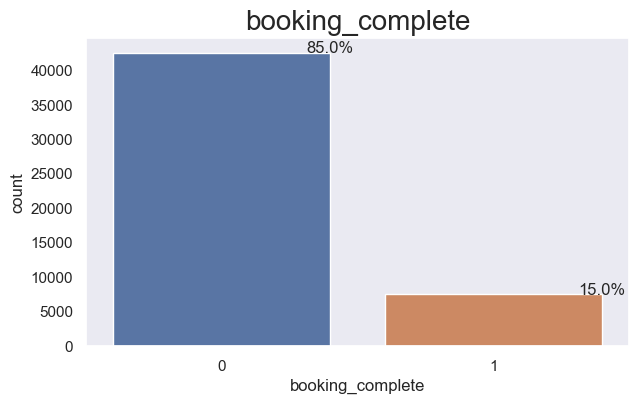

In [28]:
sns.set(style="dark")
plt.figure(figsize=[7,4])
total=float(len(df['booking_complete']))
ax=sns.countplot(x='booking_complete', data=df)
plt.title("booking_complete", fontsize=20)
for p in ax.patches:
    percentage= '{:.1f}%'.format(100*p.get_height()/total)
    x=p.get_x() + p.get_width()
    y=p.get_height()
    ax.annotate(text=percentage, xy=(x, y), ha="center")
plt.show()

<AxesSubplot:xlabel='flight_day', ylabel='purchase_lead'>

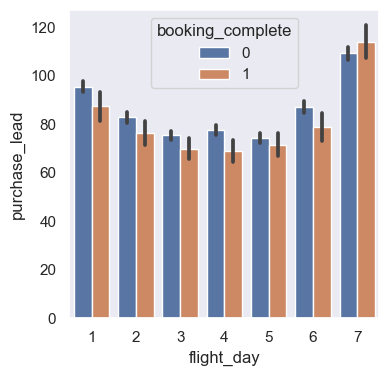

In [29]:
plt.figure(figsize=(4,4))
sns.barplot(x="flight_day", y="purchase_lead", hue ="booking_complete", data=df)

<AxesSubplot:xlabel='booking_complete,sales_channel'>

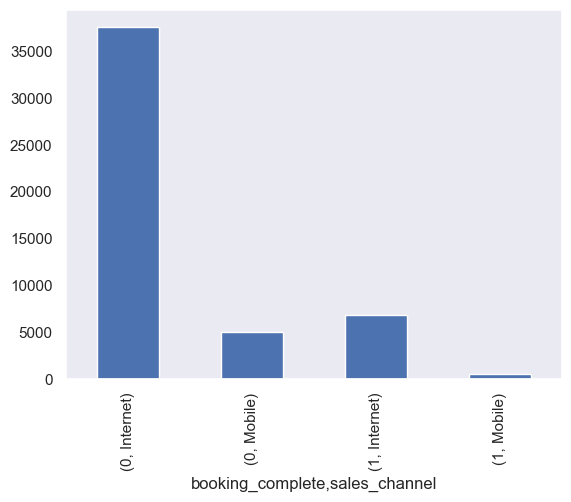

In [30]:
df.groupby(["booking_complete", "sales_channel"]).sales_channel.count().plot(kind="bar")

In [31]:
df.groupby(["booking_complete", "trip_type"]).trip_type.count()

booking_complete  trip_type 
0                 CircleTrip      111
                  OneWay          367
                  RoundTrip     42044
1                 CircleTrip        5
                  OneWay           20
                  RoundTrip      7453
Name: trip_type, dtype: int64

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

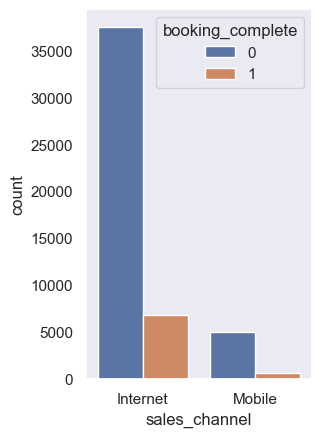

In [32]:
plt.subplot(1,2,1)
sns.countplot(x='sales_channel', hue='booking_complete', data=df)

In [33]:
def countplots(df, col=""):   
    sns.set(style="dark")
    plt.figure(figsize=[4,4])
    total=float(len(df[col]))
    ax=sns.countplot(x=col, data=df, hue="booking_complete")
    plt.title(col, fontsize=20)
    for p in ax.patches:
        percentage= '{:.1f}%'.format(100*p.get_height()/total)
        x=p.get_x() + p.get_width()
        y=p.get_height()
        ax.annotate(text=percentage, xy=(x, y), ha="center")
    plt.show()

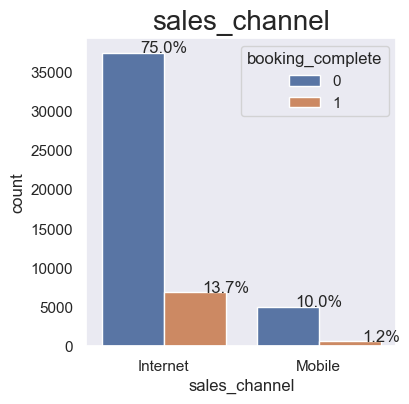

In [34]:
countplots(df, "sales_channel")

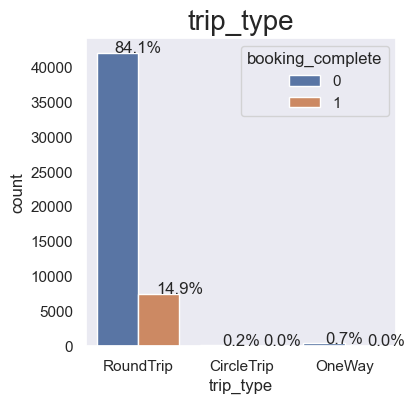

In [35]:
countplots(df, "trip_type")

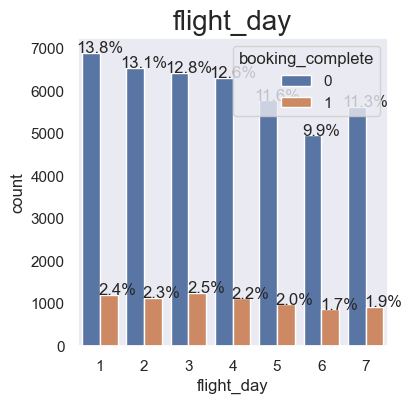

In [36]:
countplots(df, "flight_day")

In [37]:
df.groupby(["wants_in_flight_meals", "booking_complete"]).booking_complete.count()

wants_in_flight_meals  booking_complete
0                      0                   24593
                       1                    4050
1                      0                   17929
                       1                    3428
Name: booking_complete, dtype: int64

In [38]:
df.groupby(["wants_preferred_seat", "booking_complete"]).booking_complete.count()

wants_preferred_seat  booking_complete
0                     0                   30303
                      1                    4849
1                     0                   12219
                      1                    2629
Name: booking_complete, dtype: int64

In [39]:
df.groupby(["trip_type", "booking_complete"]).booking_complete.count()

trip_type   booking_complete
CircleTrip  0                     111
            1                       5
OneWay      0                     367
            1                      20
RoundTrip   0                   42044
            1                    7453
Name: booking_complete, dtype: int64

In [40]:
df.groupby(["wants_extra_baggage", "booking_complete"]).booking_complete.count()

wants_extra_baggage  booking_complete
0                    0                   14656
                     1                    1905
1                    0                   27866
                     1                    5573
Name: booking_complete, dtype: int64

In [41]:
df.groupby(["booking_complete"]).purchase_lead.sum()

booking_complete
0    3647534
1     599490
Name: purchase_lead, dtype: int64

In [42]:
df.groupby("booking_complete").num_passengers.sum()

booking_complete
0    67224
1    12338
Name: num_passengers, dtype: int64

In [43]:
df.groupby(["flight_day", "booking_complete"]).booking_complete.count()

flight_day  booking_complete
1           0                   6898
            1                   1204
2           0                   6544
            1                   1129
3           0                   6422
            1                   1252
4           0                   6302
            1                   1122
5           0                   5778
            1                    983
6           0                   4951
            1                    861
7           0                   5627
            1                    927
Name: booking_complete, dtype: int64

In [44]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.utils.multiclass import unique_lables
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay, classification_report

In [45]:
encoder = LabelEncoder()

In [46]:
df["route"] = encoder.fit_transform(df["route"])
df["sales_channel"] = encoder.fit_transform(df["sales_channel"])
df["booking_origin"] = encoder.fit_transform(df["booking_origin"])
df["trip_type"] = encoder.fit_transform(df["trip_type"])


In [47]:
x =df.drop("booking_complete", axis=1)
Y = df["booking_complete"]
Y.unique
x.trip_type.unique()

array([2, 0, 1])

In [48]:
x_train, x_test,y_train, y_test = train_test_split(x,Y, test_size=0.2)

In [49]:
rf = RandomForestClassifier(random_state=42)

In [50]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
y_predict = rf.predict(x_test)

In [52]:
accuracy_score(y_test,y_predict)

0.8566

In [53]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8532
           1       0.57      0.09      0.16      1468

    accuracy                           0.86     10000
   macro avg       0.72      0.54      0.54     10000
weighted avg       0.82      0.86      0.81     10000



In [54]:
importance=rf.feature_importances_

In [55]:
columns = x_train.columns

In [56]:
rf_coef = pd.Series(importance, columns)

In [57]:
rf_coef

num_passengers           0.052180
sales_channel            0.011642
trip_type                0.001845
purchase_lead            0.216321
length_of_stay           0.138907
flight_hour              0.155647
flight_day               0.099018
route                    0.183419
booking_origin           0.000000
wants_extra_baggage      0.015002
wants_preferred_seat     0.015785
wants_in_flight_meals    0.021595
flight_duration          0.088638
dtype: float64

<AxesSubplot:>

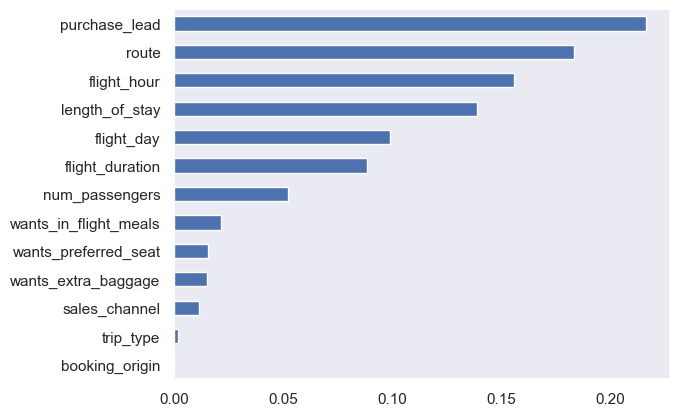

In [58]:
rf_coef.sort_values().plot(kind="barh")